## Figuring a comparison between the seismograms for acoustic, viscoacoustic power-law Q, and viscoacoustic constant Q

### Qi Hao, Aug. 23, 2021

In [21]:
import numpy as np
from  scipy import ndimage as ng
import matplotlib.pyplot as plt

from plt2dfuns import *

In [22]:
### create folder "figs" for the output figs
import os
if not os.path.exists('./figs'):
    os.makedirs('./figs')

if not os.path.exists('./figs_supp'):
    os.makedirs('./figs_supp')

In [23]:
# Definition of modelling parameters
# ----------------------------------
nx_marm = 737
nz_marm = 320

dx   = 50 * 0.005     # grid point distance in x-direction
dz   = dx        # grid point distance in z-direction

nt = 2000

dt = 50 * 1E-3

#### Source coordinates

In [24]:
#### source position
n_absorb = 40
xmax = (nx_marm - 1) * dx   # maximum spatial extension of the 2D model in x-direction (km)
zmax = (nz_marm - 1) * dz   # maximum spatial extension of the 2D model in z-direction(km)

xsrc = xmax/2   # x-coordinate of source (km)
zsrc = 225*dz   # z-coordinate of source (km)

### --------------------------------------------               
isrc = (int)(xsrc/dx+0.5)  # source location in grid in x-direction
jsrc = (int)(zsrc/dz+0.5)  # source location in grid in z-direction

xcoord = (isrc-n_absorb)*dx
zcoord = (jsrc-n_absorb)*dz

### source coordinate in the Marmousi model after removing the absorbing boundary
print("(xs,zs)=",(xcoord,zcoord))

(xs,zs)= (82.0, 46.25)


In [25]:
### Read seismograms
seis_tmp_noQ    = np.load('./out/seism_iQflag_0_5thOrder.npy')

seis_tmp_powerQ = np.load('./out/seism_iQflag_1_5thOrder.npy')

seis_tmp_constQ = np.load('./out/seism_iQflag_1_constQ_5thOrder.npy')

In [26]:
seis_tmp_noQ.shape

(2000, 737)

In [27]:
# ##### Illustration of source-receiver geometry
n_absorb = 40

ix_range = range(n_absorb,nx_marm-n_absorb)

nx = nx_marm - 2*n_absorb
nz = nz_marm - 2*n_absorb

In [28]:
seis_noQ    = seis_tmp_noQ[:,ix_range]

seis_powerQ = seis_tmp_powerQ[:,ix_range]

seis_constQ = seis_tmp_constQ[:,ix_range]

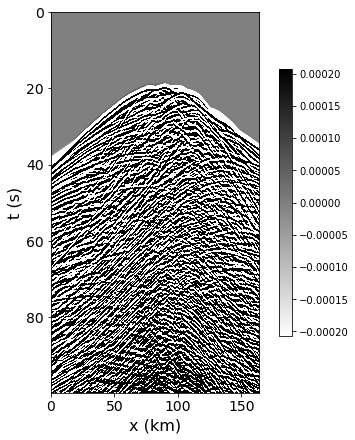

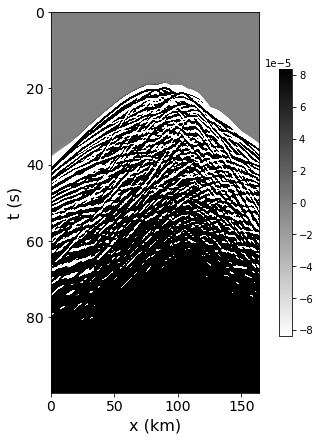

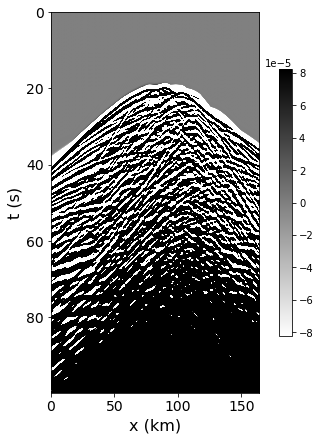

In [29]:
### coarse data

plot_data(seis_noQ, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.1, asp=3, color='binary')

plot_data(seis_powerQ, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.1, asp=3, color='binary')

plot_data(seis_constQ, nt, nx, dt, dx, zlab='t (s)', xlab='x (km)', alpha=2, clip=0.1, asp=3, color='binary')

### Supplementary figures

val_range= (-1.0996913387198149e-05, 2.0660569480201188e-05)


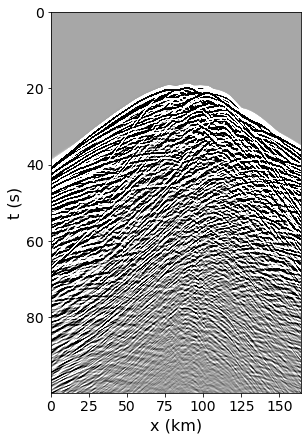

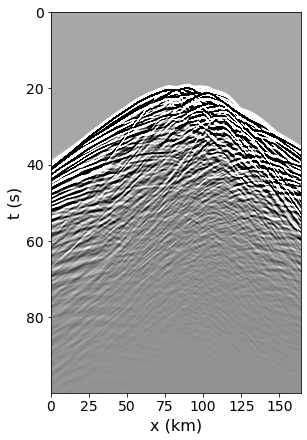

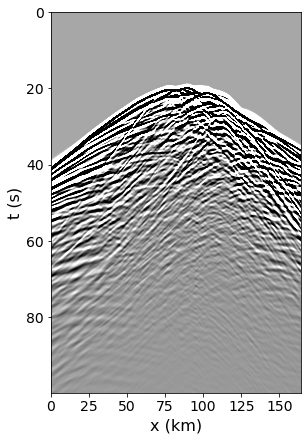

In [30]:
factor = 0.01

val_min = np.min(seis_noQ) * factor
val_max = np.max(seis_noQ) * factor

val_range = (val_min, val_max)

print("val_range=",val_range)

alpha_val = 0.4
clip_val  = 1

#### Enhanced illustration with gaining and clipping
plot_data(seis_noQ, nt, nx, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=alpha_val, clip=clip_val, vrange=val_range, asp=2.5, bar=False, \
          color='binary', fname='./figs_supp/seis_noQ.pdf')

#### Enhanced illustration with gaining and clipping
plot_data(seis_powerQ, nt, nx, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=alpha_val, clip=clip_val, vrange=val_range, asp=2.5, bar=False, color='binary', \
         fname='./figs_supp/seis_powerQ.pdf')

#### Enhanced illustration with gaining and clipping
plot_data(seis_constQ, nt, nx, dt, dx, \
          zlab='t (s)', xlab='x (km)', alpha=alpha_val, clip=clip_val, vrange=val_range, asp=2.5, bar=False, color='binary', \
         fname='./figs_supp/seis_constQ.pdf')

In [31]:
### central-trace x coordinatt
print("Xmax=",(nx-1)*dx)
print("Xcenter=",nx*dx/2)

Xmax= 164.0
Xcenter= 82.125


### Journal Figures

trace_x = 10.0
trace_id = 40


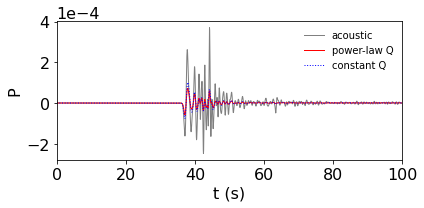

without the acoustic curve


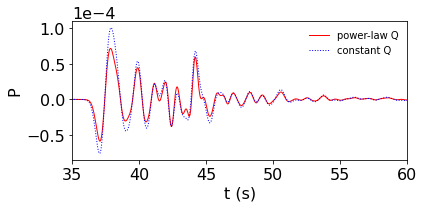

In [32]:
##### the left trace
trace_x  = 0.2 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_left1_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(35, 60)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_left2_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 82.0
trace_id = 328


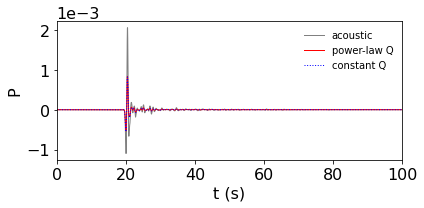

without the acoustic curve


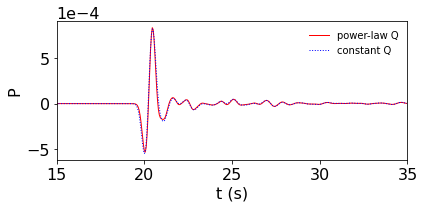

In [33]:
##### the central trace
trace_x  = 1.64 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0.0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_center1_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(15, 35)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_center2_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 154.0
trace_id = 616


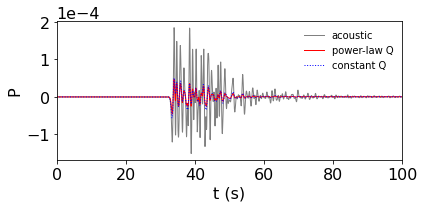

without the acoustic curve


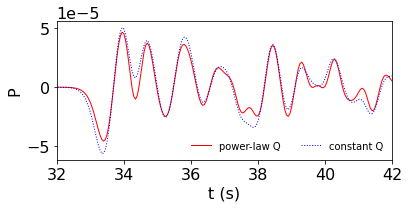

In [34]:
##### the right trace
trace_x  = 3.08 * 50
trace_id = int(trace_x / dx)

print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0.0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_right1_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(32, 42)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="lower right", ncol=2, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs/single_trace_right2_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

### Supplementary figures

trace_x = 20.0
trace_id = 80


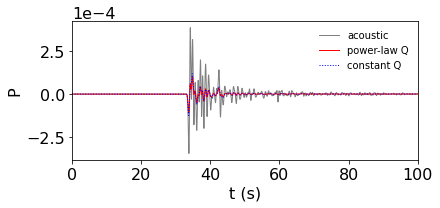

without the acoustic curve


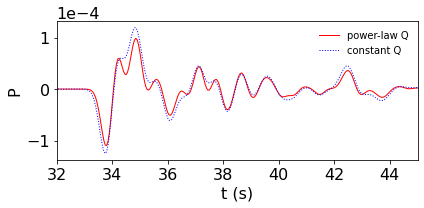

In [35]:
##### the left trace
trace_x  = 0.4 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x20_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(32, 45)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x20_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 40.0
trace_id = 160


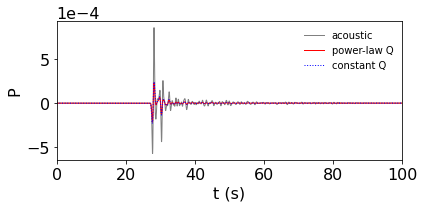

without the acoustic curve


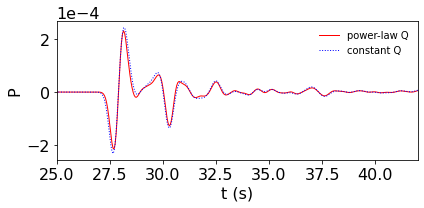

In [36]:
##### the left trace
trace_x  = 0.8 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x40_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(25, 42)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x40_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 60.0
trace_id = 240


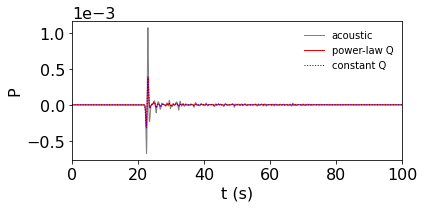

without the acoustic curve


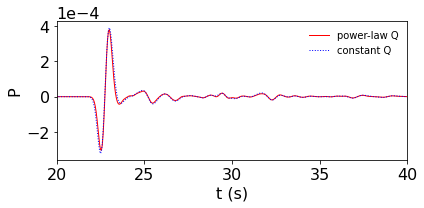

In [37]:
##### the left trace
trace_x  = 1.2 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x60_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(20, 40)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x60_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 144.0
trace_id = 576


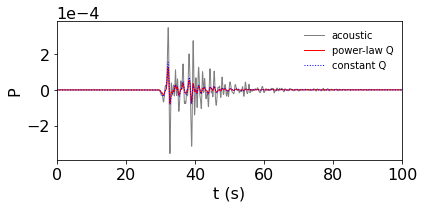

without the acoustic curve


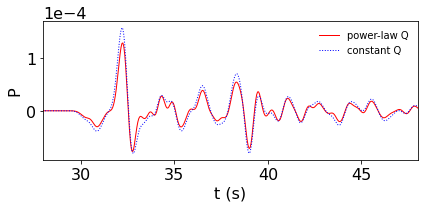

In [38]:
##### the right trace
trace_x  = 2.88 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x144_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(28, 48)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x144_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 124.0
trace_id = 496


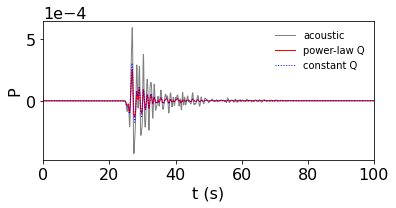

without the acoustic curve


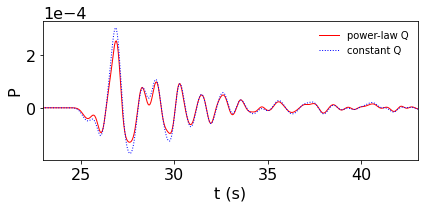

In [39]:
##### the right trace
trace_x  = 2.48 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x124_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(23, 43)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x124_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()

trace_x = 104.0
trace_id = 416


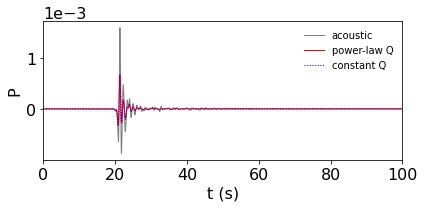

without the acoustic curve


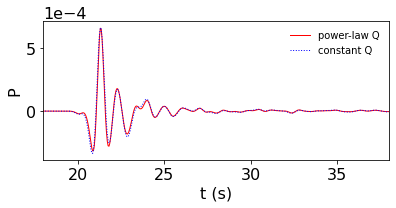

In [40]:
##### the right trace
trace_x  = 2.08 * 50
trace_id = int(trace_x / dx)
print("trace_x = " + str(trace_x))
print("trace_id = " + str(trace_id))

time   = np.arange(nt)*dt

seis_trace0 = seis_noQ[:, trace_id]
seis_trace1 = seis_powerQ[:, trace_id]
seis_trace2 = seis_constQ[:, trace_id]


fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace0, color='gray', linestyle='solid',  lw=1, \
               label="acoustic")
l2, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l3, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(0, 100.0)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))    

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x104_a_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()


#####################################
print("without the acoustic curve")

fig = plt.figure(figsize=(6,3))
plt.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.9)

#### subplot 1
ax = fig.add_subplot(1, 1, 1)

l1, = ax.plot(time, seis_trace1, color='red',  linestyle='solid',  lw=1, \
               label="power-law Q") # plot FD seismogram
l2, = ax.plot(time, seis_trace2, color='blue', linestyle='dotted', lw=1, \
               label="constant Q") # plot FD seismogram

ax.set_xlim(18, 38)

ax.set_ylabel("P", fontsize=16)

ax.ticklabel_format(useOffset=False)
### scientific notation for the y axis ticks
ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

### tick size
ax.tick_params(labelsize=16)
ax.yaxis.get_offset_text().set_fontsize(16)

plt.xlabel("t (s)", fontsize=16)
    
## plot legends. 
ax.legend(loc="upper right", ncol=1, fontsize=10, frameon=False)

fig.tight_layout()

fname = "./figs_supp/single_trace_x104_b_1hz.pdf"
plt.savefig(fname, format="pdf", dpi=800, bbox_inches="tight")
    
plt.show()
plt.close()